# Quickstart for Synthesis AI datasets

First, we install `synthesisai` and download test datasets.


In [ ]:
%%bash
python -m pip install synthesisai
curl https://synthesisai-example-datasets.s3.amazonaws.com/humans_api_example_dataset.zip -o humans_api_example_dataset.zip
unzip humans_api_example_dataset.zip -d humans_api_example_dataset

Now we add some imports for the visualisation.

In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

We use `SaiDataset` class to access synthesis datasets.


In [11]:
from synthesisai import SaiDataset, Modality

In [12]:
data_root = "humans_api_example_dataset"
dataset = SaiDataset(data_root)

Ignoring unsupported modality Modality.CLOTHING_SEGMENTATION


The only required parameter is dataset root. By default all the modailities are loaded.

In [13]:
len(dataset)

50

There are 50 items in the test dataset. Let's explore them closer.

In [14]:
item = dataset[0]
item2 = dataset[2]

Each item is a dict with different modalities as keys.

In [15]:
item.keys()

dict_keys([<Modality.SCENE_ID: 1>, <Modality.RGB: 2>, <Modality.NORMALS: 3>, <Modality.DEPTH: 4>, <Modality.BODY_SEGMENTATION: 5>, <Modality.INSTANCE_SEGMENTATION: 7>, <Modality.LANDMARKS_IBUG68: 8>, <Modality.LANDMARKS_CONTOUR_IBUG68: 9>, <Modality.LANDMARKS_KINECT_V2: 10>, <Modality.LANDMARKS_MEDIAPIPE: 11>, <Modality.LANDMARKS_COCO: 12>, <Modality.LANDMARKS_MPEG4: 13>, <Modality.LANDMARKS_3D_IBUG68: 14>, <Modality.LANDMARKS_3D_KINECT_V2: 15>, <Modality.LANDMARKS_3D_MEDIAPIPE: 16>, <Modality.LANDMARKS_3D_COCO: 17>, <Modality.LANDMARKS_3D_MPEG4: 18>, <Modality.PUPILS: 19>, <Modality.PUPILS_3D: 20>, <Modality.IDENTITY: 21>, <Modality.IDENTITY_METADATA: 22>, <Modality.HAIR: 23>, <Modality.FACIAL_HAIR: 24>, <Modality.EXPRESSION: 25>, <Modality.GAZE: 26>, <Modality.FACE_BBOX: 27>, <Modality.HEAD_TO_CAM: 28>, <Modality.CAM_TO_HEAD: 29>, <Modality.HEAD_TO_WORLD: 30>, <Modality.WORLD_TO_HEAD: 31>, <Modality.CAM_TO_WORLD: 32>, <Modality.WORLD_TO_CAM: 33>, <Modality.CAM_INTRINSICS: 34>, <Modal

`SCENE_ID` is the id of the image (number used in the stem of the file).

In [16]:
item[Modality.SCENE_ID]

0

`RGB` modality is the rendered image.

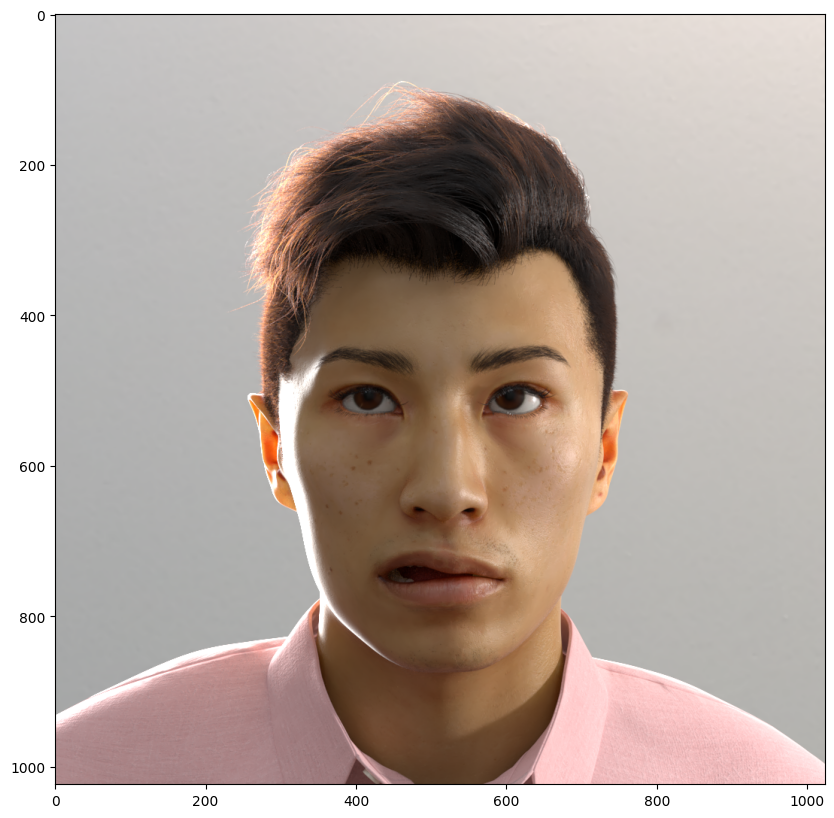

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(item[Modality.RGB])

`FACE_BBOX` modality is a face bounding box in format `x0, y0, x1, y1`.

In [18]:
def plot_bbox(image, face_bbox):
    plt.figure(figsize=(10,10))

    image = cv2.rectangle(image.copy(), face_bbox[:2], face_bbox[2:], (255, 0, 0), 2)
    plt.imshow(image)

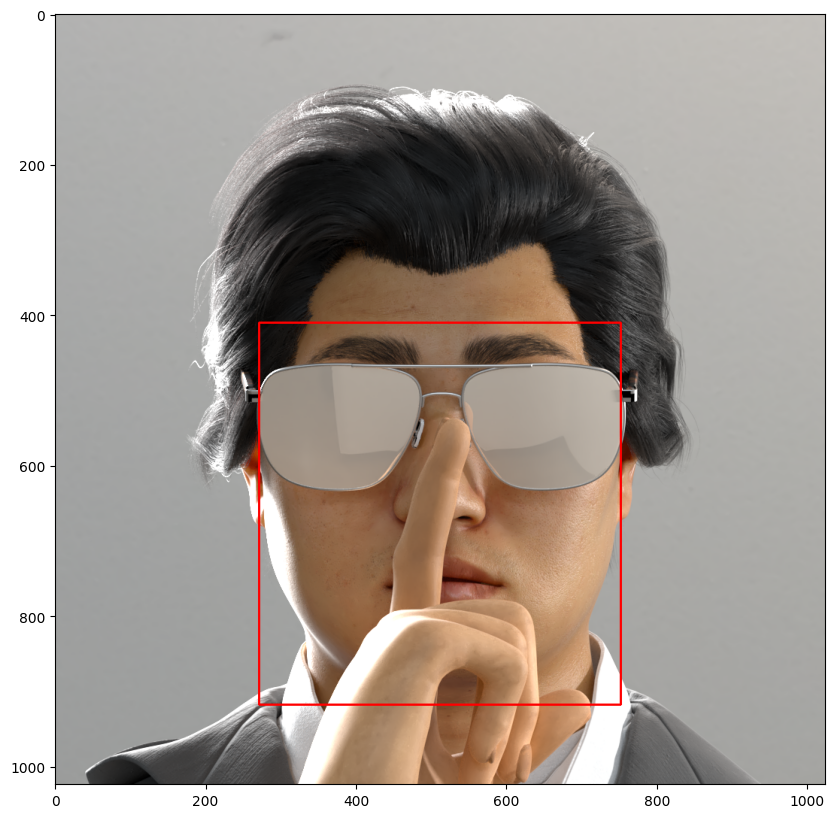

In [19]:
item = dataset[1]
# this loop will only iterate once since there is only one human in this example
for human_instance_id, bbox in item[Modality.FACE_BBOX].items():
    plot_bbox(item[Modality.RGB], bbox)

`BODY_SEGMENTATION` modality is the segmentation map for body segmentation. We can see mapping of different classes to indices with `body_segmentation_mapping`
method o the dataset.

In [20]:
dataset.body_segmentation_mapping

{'default': 0,
 'background': 0,
 'beard': 1,
 'body': 2,
 'brow': 3,
 'cheek_left': 4,
 'cheek_right': 5,
 'chin': 6,
 'clothing': 7,
 'ear_left': 8,
 'ear_right': 9,
 'eye_left': 10,
 'eye_right': 11,
 'eyelashes': 12,
 'eyelid': 13,
 'eyes': 14,
 'forehead': 15,
 'glasses': 16,
 'hair': 17,
 'head': 18,
 'headphones': 19,
 'headwear': 20,
 'jaw': 21,
 'jowl': 22,
 'lip_lower': 23,
 'lip_upper': 24,
 'mask': 25,
 'mouth': 26,
 'mouthbag': 27,
 'mustache': 28,
 'neck': 29,
 'nose': 30,
 'nose_outer': 31,
 'nostrils': 32,
 'shoulders': 33,
 'smile_line': 34,
 'teeth': 35,
 'temples': 36,
 'tongue': 37,
 'undereye': 38,
 'eyebrows': 89,
 'torso_lower_left': 40,
 'torso_lower_right': 41,
 'torso_mid_left': 42,
 'torso_mid_right': 43,
 'torso_upper_left': 44,
 'torso_upper_right': 45,
 'arm_lower_left': 46,
 'arm_lower_right': 47,
 'arm_upper_left': 48,
 'arm_upper_right': 49,
 'hand_left': 50,
 'hand_right': 51,
 'finger1_mid_bottom_left': 52,
 'finger1_mid_bottom_right': 53,
 'finger1_m

Segmentation is an integral numpy array with the same dimensions as the original image.
To display it we write a simple helper function:

In [22]:
def discrete_show(data):
    cmap = plt.get_cmap('RdBu', np.max(data) - np.min(data) + 1)
    plt.imshow(data, cmap=cmap, vmin=np.min(data) - .5,
               vmax = np.max(data) + .5, interpolation="nearest")

Let's look at segmentation results.

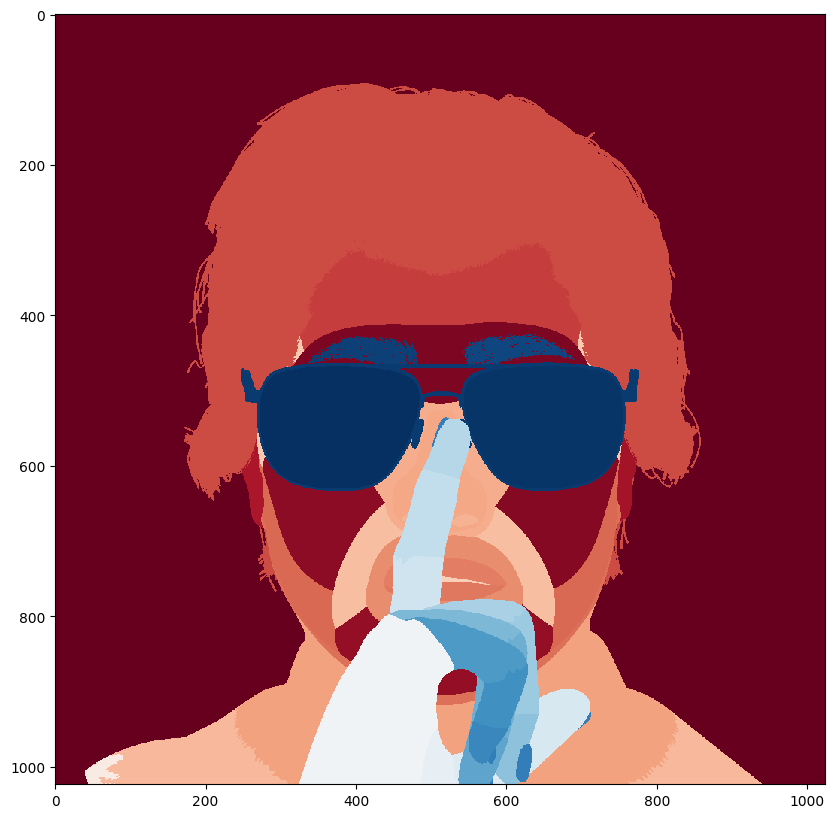

In [23]:
plt.figure(figsize=(10,10))
discrete_show(item[Modality.BODY_SEGMENTATION])

You can also define your own segmentation mapping:

In [25]:
face_hair_segments = {  'default': 0,
                        'background': 0,
                        'beard': 1,
                        'brow': 1,
                        'cheek_left': 1,
                        'cheek_right': 1,
                        'chin': 1,
                        'ear_left': 1,
                        'ear_right': 1,
                        'eye_left': 1,
                        'eye_right': 1,
                        'eyelashes': 1,
                        'eyelid': 1,
                        'eyes': 1,
                        'forehead': 1,
                        'hair': 2,
                        'head': 1,
                        'jaw': 1,
                        'jowl': 1,
                        'lip_lower': 1,
                        'lip_upper': 1,
                        'mouth': 1,
                        'mouthbag': 1,
                        'mustache': 1,
                        'nose': 1,
                        'nose_outer': 1,
                        'nostrils': 1,
                        'smile_line': 1,
                        'teeth': 1,
                        'temples': 1,
                        'tongue': 1,
                        'undereye': 1,
                        'eyebrows': 2,
                        'pupil_left': 1,
                        'pupil_right': 1,
                        'eyelashes_left': 2,
                        'eyelashes_right': 2,
                        'eyelid_left': 1,
                        'eyelid_right': 1,
                        'eyebrow_left': 2,
                        'eyebrow_right': 2,
                        'glasses_frame': 0,
                        'glasses_lens_left': 0,
                        'glasses_lens_right': 0,
                        'undereye_left': 1,
                        'undereye_right': 1,
                        'cornea_left': 1,
                        'cornea_right': 1,
                        'sclera_left': 1,
                        'sclera_right': 1
                       }

We can provide this mapping during the creation of the dataset to change the segmentation modality output.

This example will work for face/hair segmentation:

Ignoring unsupported modality Modality.CLOTHING_SEGMENTATION


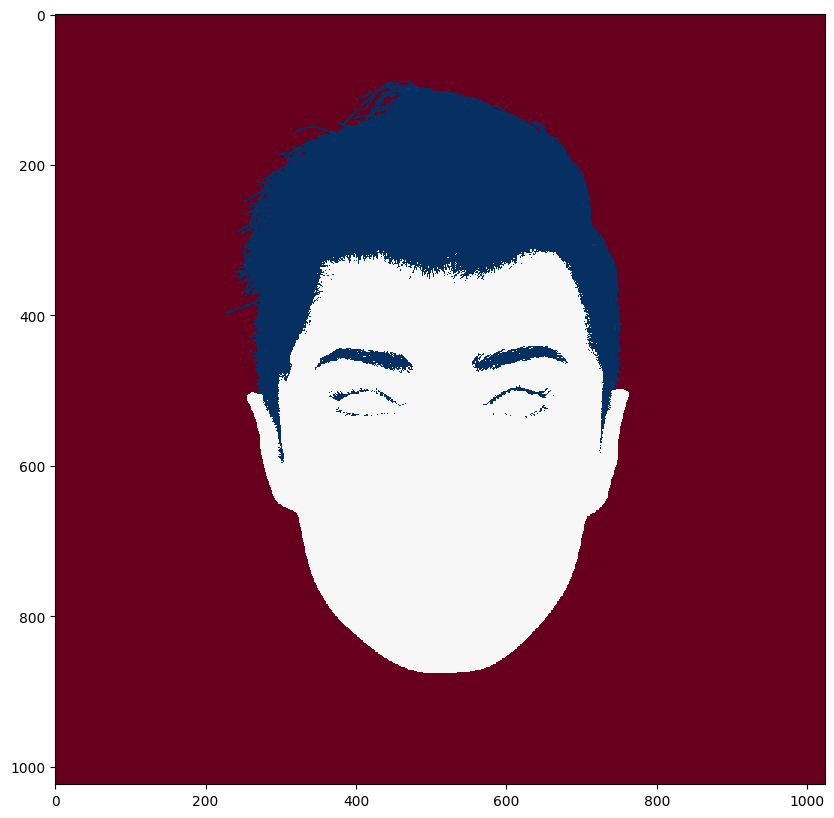

In [26]:
plt.figure(figsize=(10,10))
discrete_show(SaiDataset(data_root, body_segmentation_mapping=face_hair_segments)[0][Modality.BODY_SEGMENTATION])

And here is a simple example of foreground/background segmentation:

In [27]:
foreground_segments = { 'default': 1,
                        'background': 0 }

Ignoring unsupported modality Modality.CLOTHING_SEGMENTATION


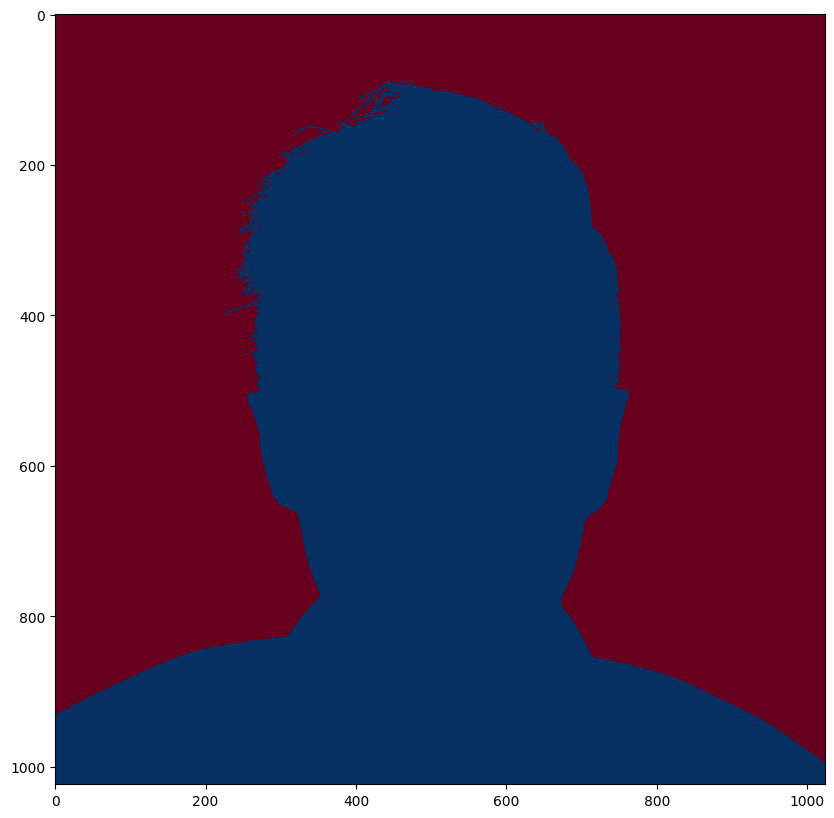

In [28]:
plt.figure(figsize=(10,10))
discrete_show(SaiDataset(data_root, body_segmentation_mapping=foreground_segments)[0][Modality.BODY_SEGMENTATION])

Normals modality is a 3-channel numpy array with each chanel values from `-1.0` to `1.0`.

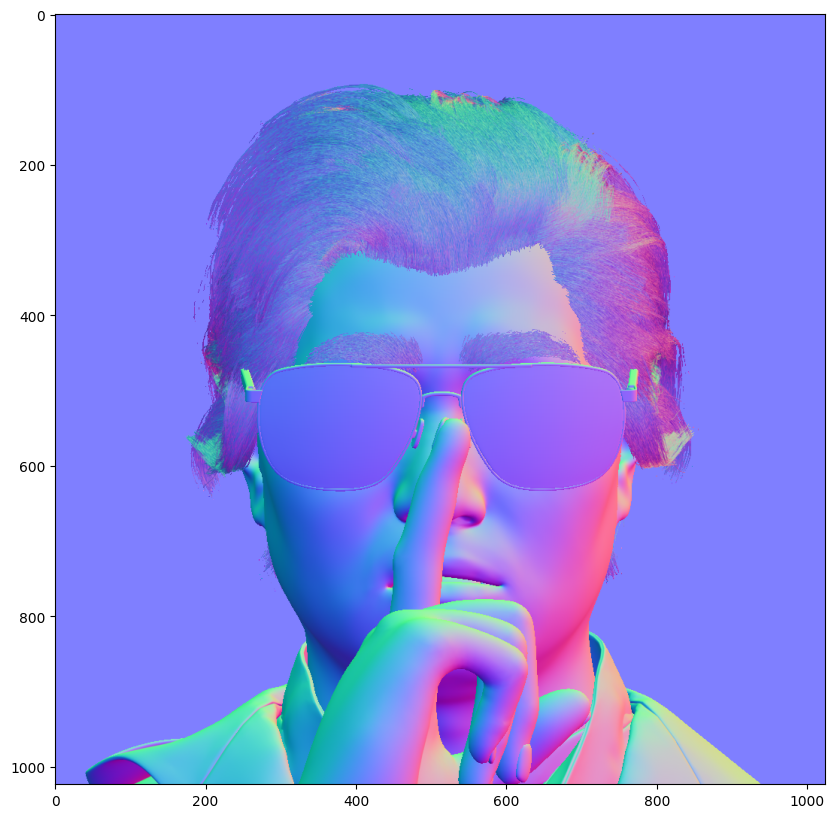

In [29]:
plt.figure(figsize=(10,10))
plt.imshow(((item[Modality.NORMALS] + 1) / 2 * 255).astype(np.uint8))

Depth modality is an array of positive floats. Background is set to have depth equal to `0`,
and for the rest of the image it represents distance to camera space in meters.

We write a simple helper function and display it.

In [30]:
def depth_show(img, shift=0.1):
    eps = 0.003
    d_min = img[img > eps].min()
    d_max = img[img > eps].max()
    d_img = np.copy(img)
    d_img[d_img < eps] = 0
    d_img[d_img > eps] = (d_img[d_img > eps] - d_min) / (d_max - d_min) *  (1 - shift) + shift
    plt.imshow((d_img * 255).astype(np.uint8), cmap="gray_r")

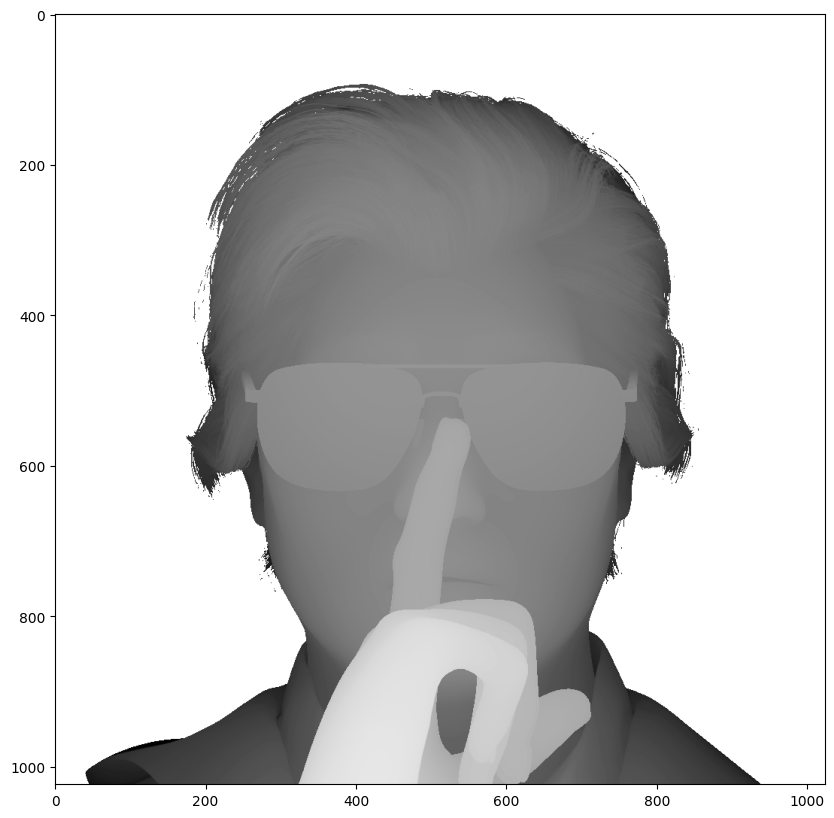

In [31]:
plt.figure(figsize=(10,10))
depth_show(item[Modality.DEPTH])

Landmarks are in iBUG format. Each of 68 landmarks is represented by its `x` and `y` coordinates in image space,
`y` coordinate going from top to bottom.

In [32]:
def landmark_show(img, landmarks, radius=2, labels=True):
    l_img = np.copy(img)
    for name, (x, y) in landmarks.items():
        int_p = (int(x), int(y))
        cv2.circle(l_img, int_p, radius=radius, color=(255, 0, 0), thickness=cv2.FILLED)
    plt.imshow(l_img)

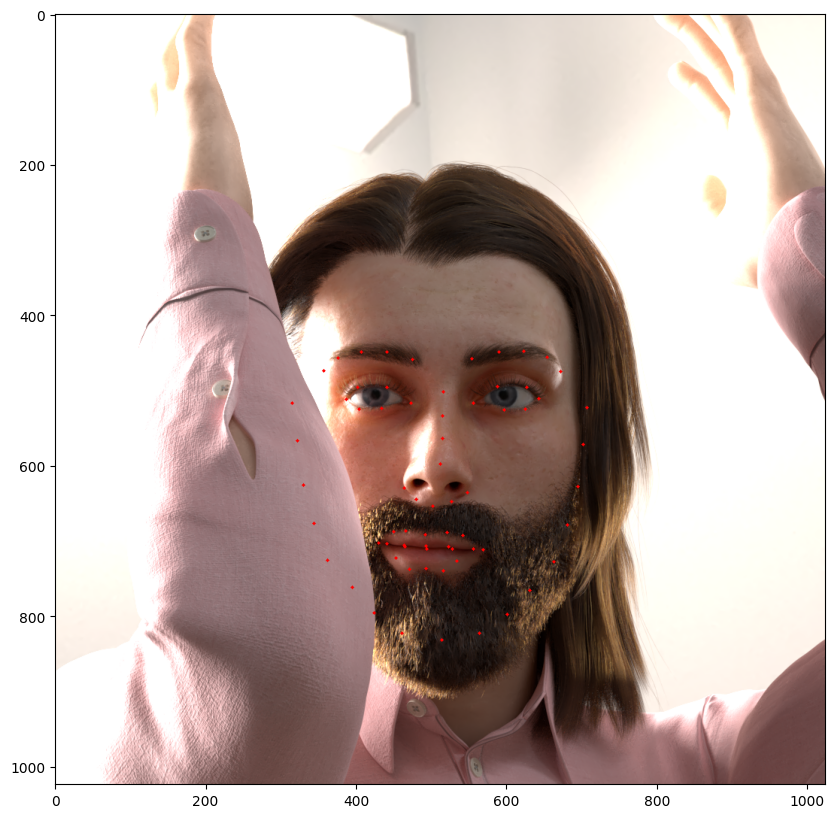

In [36]:
item = dataset[21]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_IBUG68].items():
    landmark_show(item[Modality.RGB], landmarks)

**Warning!** Contour landmarks are slightly different from iBUG.
Instead of showing the contour of the face in our dataset they have the fixed position on the face.

This looks a bit strange on rotated images, but these landmarks are more useful for multiple tasks,
such as facial pose retrival and special effects.

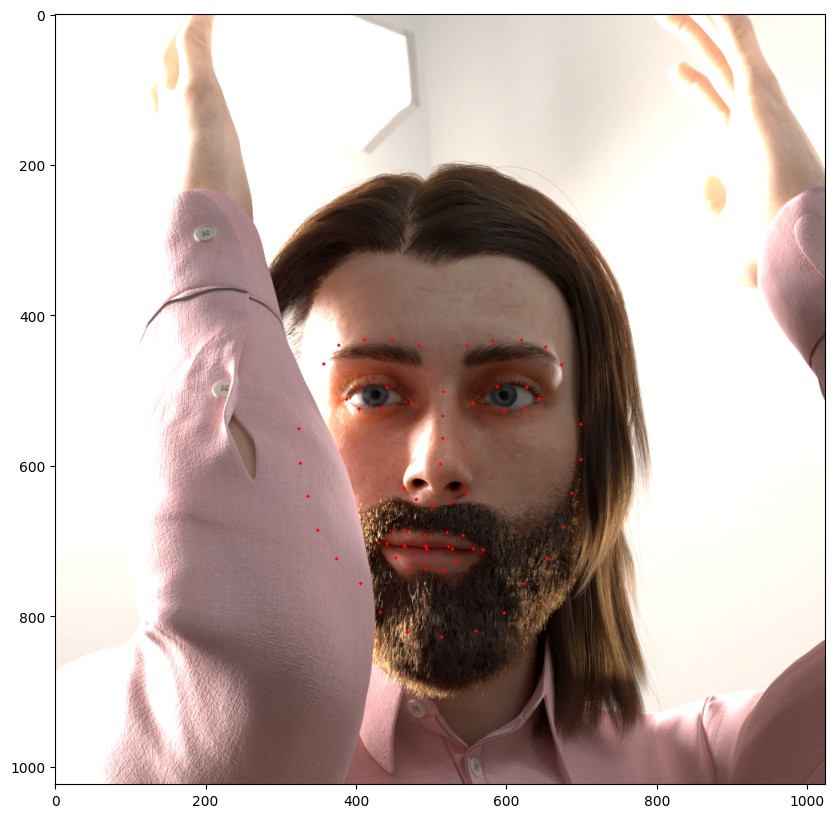

In [37]:
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, landmarks in item[Modality.LANDMARKS_CONTOUR_IBUG68].items():
    landmark_show(item[Modality.RGB], landmarks)

iBUG does not provide landmarks for pupiles, but they can be important in multiple tasks.
Thus we provide two additional landmarks for them:

In [38]:
item[Modality.PUPILS]

{1: {'pupil_left': (596.6821899414062, 506.501220703125),
  'pupil_right': (426.83441162109375, 506.05303955078125)}}

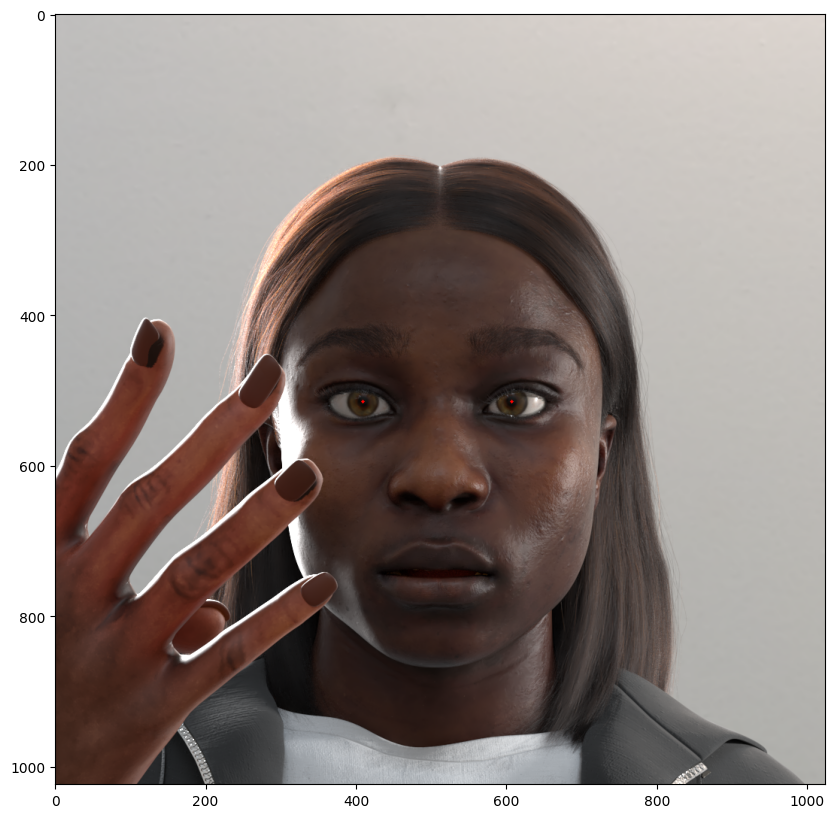

In [39]:
item = dataset[15]
plt.figure(figsize=(10,10))
# this loop will only iterate once since there is only one human in this example
for human_instance_id, pupils in item[Modality.PUPILS].items(): 
    landmark_show(item[Modality.RGB], pupils)

Gaze direction can be important in multiple tasks. We provide gaze direction as a world space vector.

In [40]:
item[Modality.GAZE]

{1: {'right': [-0.06067584455013275, -0.2926967442035675, 0.954278290271759],
  'left': [0.024464333429932594, -0.30322951078414917, 0.9526033997535706]}}

To show it on the image we have to convert it to camera space and project (for more information on different coordinate spaces and projections see intrinsics.ipynb and transforms.ipynb notebooks).

In [41]:
def gaze_show(img, pupils_info, gaze_info, world2cam, intrinsics, length = 0.01):
    pupils = np.array([pupils_info["pupil_left"], pupils_info["pupil_right"]], dtype=np.float64)
    gaze = np.array([gaze_info["left"], gaze_info["right"]])
    g_img = np.copy(img)
    start = pupils.astype(np.uint32)
    gaze_cam = np.tensordot(gaze, world2cam[:3,:3], axes=(-1,1))
    gaze_2D = np.tensordot(gaze_cam * [1, -1, -1], intrinsics, axes=(-1, 1))[:, :2]
    end = (pupils + gaze_2D * length).astype(np.uint32)
    for eye in [0, 1]:
        cv2.arrowedLine(g_img, tuple(start[eye]), tuple(end[eye]),
                        color=(255, 0, 0), thickness=2, tipLength=1)
    plt.imshow(g_img)

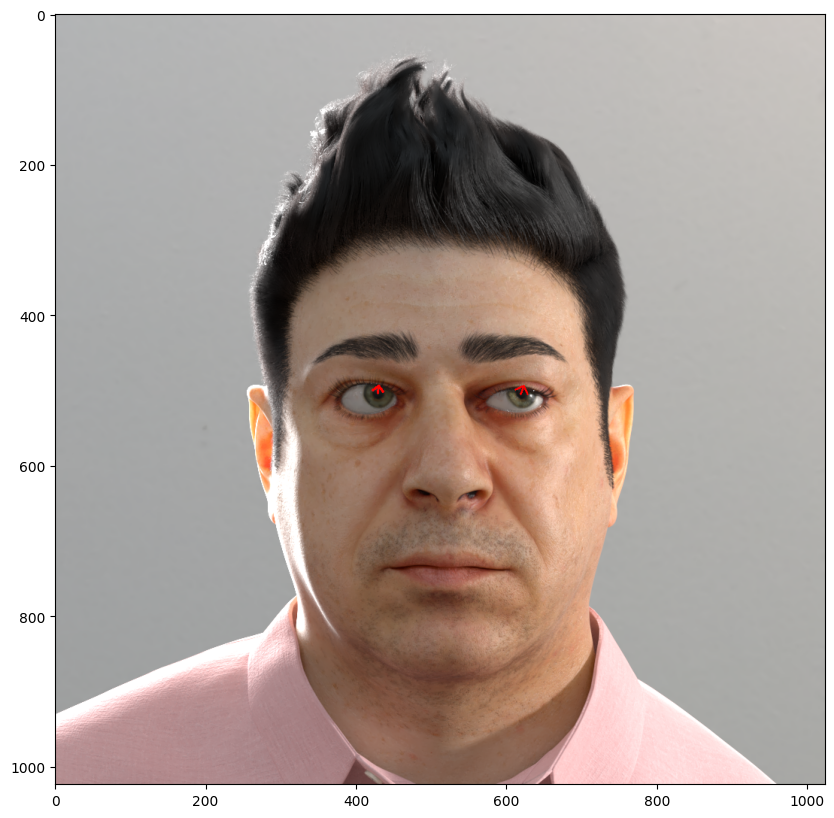

In [43]:
item = dataset[11]
plt.figure(figsize=(10,10))
world2cam = item[Modality.WORLD_TO_CAM]
intrinsics = item[Modality.CAM_INTRINSICS]
humans_instance_ids = item[Modality.PUPILS].keys()
for human_instance_id in humans_instance_ids:
    pupils_info = item[Modality.PUPILS][human_instance_id]
    gaze_info = item[Modality.GAZE][human_instance_id]

    gaze_show(item[Modality.RGB], pupils_info, gaze_info, world2cam, intrinsics)

In addition there are modalities to represent different kind of metadata:

Identity

In [44]:
item[Modality.IDENTITY]

{1: 330}

Identity metadata, such as age or gender.

In [45]:
item[Modality.IDENTITY_METADATA]

{1: {'id': 330,
  'age': 51,
  'sex': 'male',
  'outfit': 'work_casual_1',
  'eye_fold': False,
  'ethnicity': 'white',
  'height_cm': 178,
  'skin_tone': 1.92253758,
  'weight_kg': 93,
  'hair_color': 'leather_black',
  'hair_style': 'mohawk_02',
  'iris_color': '38',
  'model_index': 330,
  'height_label': 'median',
  'eyebrow_style': 'high_03',
  'texture_index': 330,
  'eyebrow_length': 0.87,
  'eyebrow_density': 0.88,
  'facial_hair_color': 'leather_black',
  'facial_hair_style': 'none',
  'fat_content_label': 'median'}}

Information about hairstyle.

In [46]:
item[Modality.HAIR]

{1: {'color': 'leather_black',
  'style': 'mohawk_02',
  'color_seed': 0,
  'relative_length': 1,
  'relative_density': 1}}

Information about facial hair.

In [47]:
item[Modality.FACIAL_HAIR]

{1: {'color': 'leather_black',
  'style': 'none',
  'color_seed': 0,
  'relative_length': 1,
  'relative_density': 1}}

Expression modality shows facial expression and its intensity.

In [48]:
item[Modality.EXPRESSION]

{1: {'name': 'eyes_opened_max_right', 'intensity': 0.5024574696069946}}

Usually not all the modalities are needed, so we can only load selected modalities in the dataset.

In [49]:
dataset2 = SaiDataset(data_root, modalities=[Modality.RGB, Modality.BODY_SEGMENTATION])

In [50]:
dataset2[0].keys()

dict_keys([<Modality.RGB: 2>, <Modality.BODY_SEGMENTATION: 5>])

Usually there are no problems with the amount of synthetic images,
however augmentations are still useful as they help to bridge the reality gap.
We can provide transformations in dataset constructor to implement augmentations needed.

Below we show how to use `albumentations` library with Synthesis AI dataset for the segmentation task.

In [51]:
import albumentations as A

In [55]:
aug = A.Compose([A.RandomRotate90(p=1), A.GridDistortion(p=1)])

def transform(item):
    augmented = aug(image=item[Modality.RGB], mask=item[Modality.BODY_SEGMENTATION])
    return {
        Modality.RGB: augmented['image'],
        Modality.BODY_SEGMENTATION: augmented['mask']
    }

dataset3 = SaiDataset(data_root, modalities=[Modality.RGB, Modality.BODY_SEGMENTATION],
                      transform=transform)

aug_item = dataset3[12]

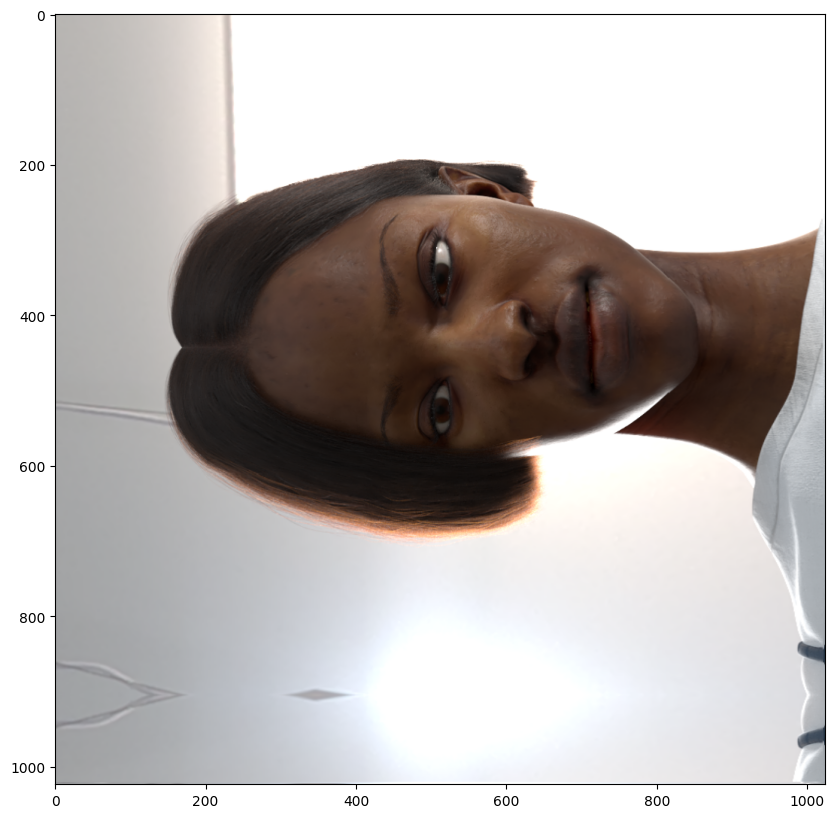

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(aug_item[Modality.RGB])


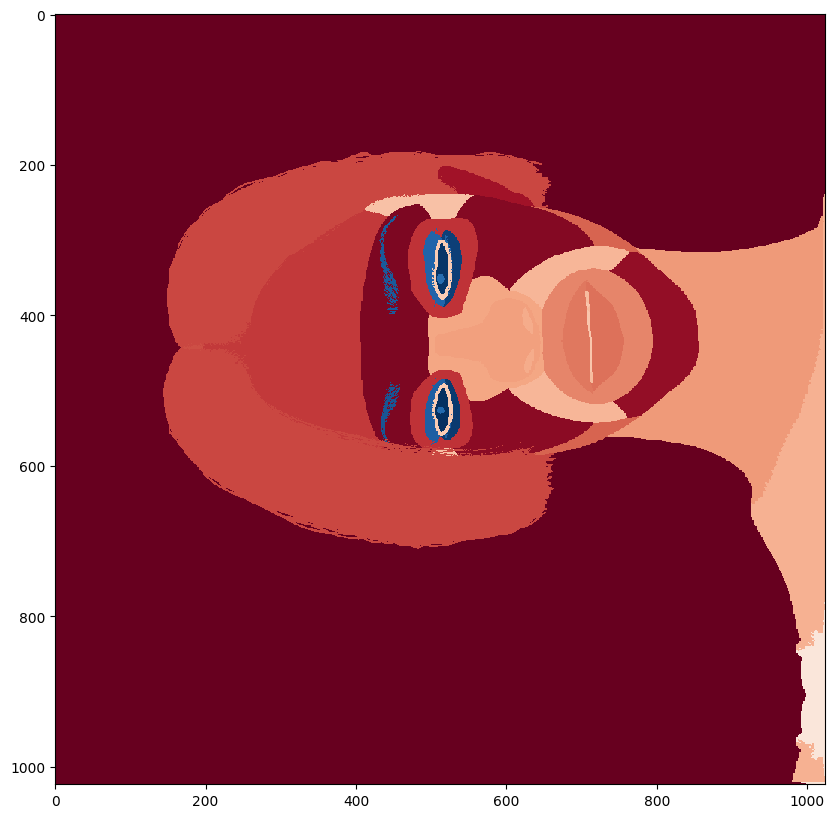

In [57]:
plt.figure(figsize=(10,10))
discrete_show(aug_item[Modality.BODY_SEGMENTATION])
